# Teknik Binning

Binning (disebut juga bucketing) adalah rekayasa fitur teknik yang mengelompokkan subrentang numerik yang berbeda ke dalam kelompok atau bucket. Dalam banyak kasus, {i>binning<i} mengubah data numerik menjadi data kategorikal.

### Library yang Dibutuhkan

In [6]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Ambil data iris asli

Anda dapat mengambil data iris yang berasal dari library sklearn dan menampilkan semua fitur

In [7]:
# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.to_string(index=False))

 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
               5.1               3.5                1.4               0.2
               4.9               3.0                1.4               0.2
               4.7               3.2                1.3               0.2
               4.6               3.1                1.5               0.2
               5.0               3.6                1.4               0.2
               5.4               3.9                1.7               0.4
               4.6               3.4                1.4               0.3
               5.0               3.4                1.5               0.2
               4.4               2.9                1.4               0.2
               4.9               3.1                1.5               0.1
               5.4               3.7                1.5               0.2
               4.8               3.4                1.6               0.2
               4.8               3.0  

### Klasifikasi Naive Bayes terhadap Data Iris

Lakukan Klasifikasi menggunakan Naive Bayes pada data iris asli untuk mencari akurasi data iris

Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



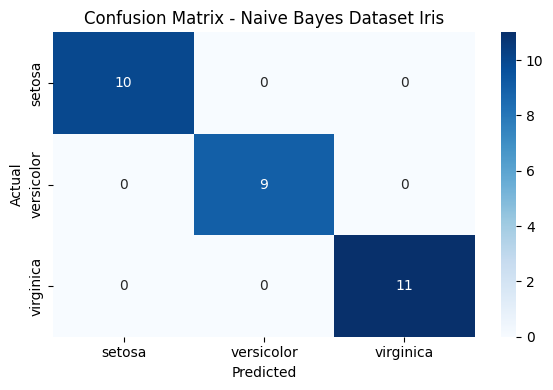

In [8]:

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Dataset Iris')
plt.tight_layout()
plt.show()


### Klasifikasi Decision Tree terhadap Data iris

Lakukan Klasifikasi menggunakan Decision Tree pada data iris asli untuk mencari akurasi data iris

Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



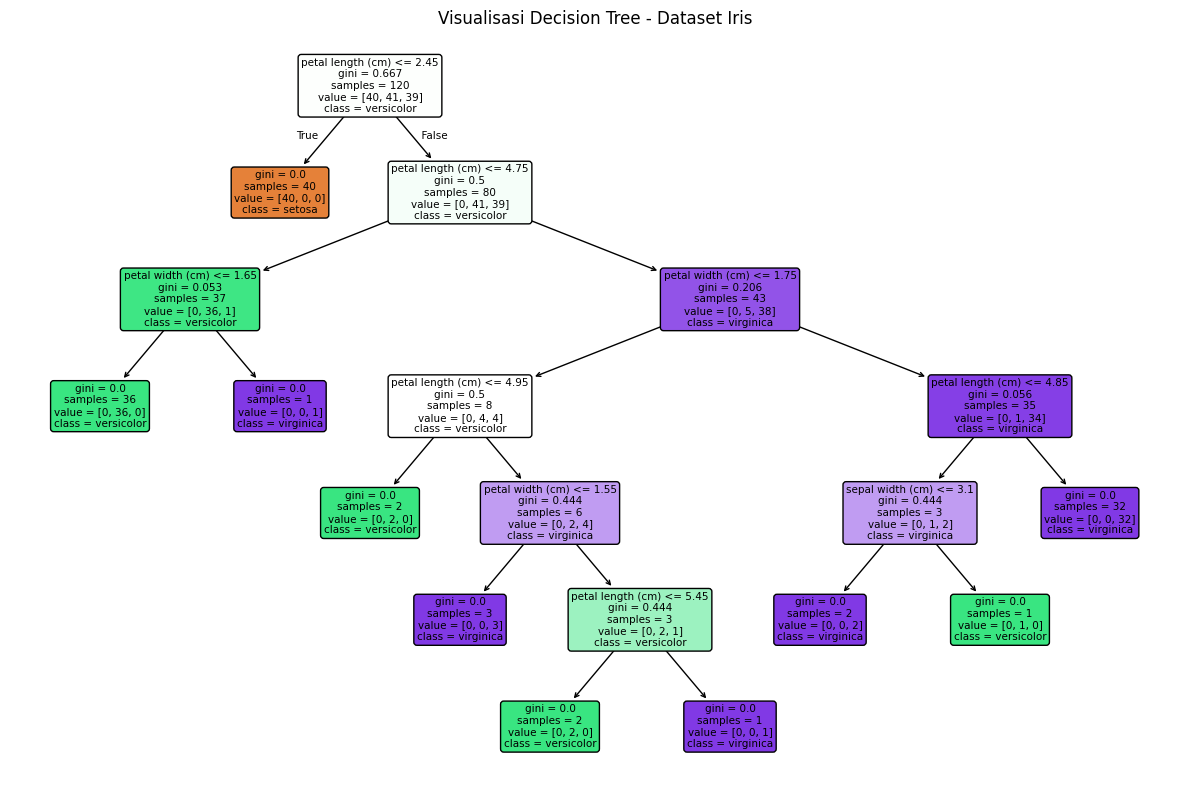

In [9]:

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=target_names))

# -------------------------
# Visualisasi Pohon Keputusan
# -------------------------
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree - Dataset Iris")
plt.tight_layout()
plt.show()

## Diskritisasi Dataset Iris

### Diskritisasi Dataset Iris menggunakan K-Means

#### Penjelasan Konsep Diskritisasi menggunakan K-means
Dalam dunia pengolahan data, salah satu pendekatan diskritisasi yang dianggap canggih dan adaptif adalah K-Means Discretization. Pendekatan ini berangkat dari metode unsupervised learning, di mana algoritma secara otomatis mempelajari pola dari data numerik yang ada. Tujuan utamanya adalah membagi data ke dalam beberapa kelompok (cluster) yang masing-masing berisi nilai-nilai yang mirip satu sama lain, berdasarkan jarak numerik. Proses dimulai dengan menentukan jumlah cluster yang diinginkan, misalnya tiga cluster. Selanjutnya, algoritma K-Means akan memilih titik pusat awal (centroid) secara acak. Setiap data kemudian diukur jaraknya ke tiap centroid dan dikelompokkan ke dalam cluster dengan jarak terdekat. Setelah semua data diklasifikasikan, posisi centroid diperbarui berdasarkan rata-rata nilai di dalam cluster masing-masing. Proses ini terus berulang hingga hasilnya stabil.

Metode ini sangat efektif dalam mengungkap pola alami dalam data yang tidak selalu terlihat dengan pendekatan konvensional. Berbeda dengan metode pemotongan rentang yang kaku, K-Means mampu membentuk kelompok berdasarkan penyebaran aktual dari nilai data. Misalnya, jika data numerik tersebar tidak merata atau memiliki kecenderungan membentuk gugus, maka K-Means dapat menghasilkan diskritisasi yang lebih bermakna. Namun, perlu dicatat bahwa metode ini memerlukan proses iteratif yang relatif kompleks dan sensitif terhadap inisialisasi awal centroid. Di sisi lain, jumlah cluster juga harus ditentukan sebelumnya, yang dalam beberapa kasus memerlukan uji coba berkali-kali untuk menemukan hasil terbaik. Meski demikian, K-Means Discretization tetap menjadi pilihan utama ketika akurasi pengelompokan data menjadi prioritas utama.

In [10]:
# Mapping angka cluster ke huruf
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Fungsi clustering per kolom
def cluster_column(column):
    values = df[[column]]
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(values)
    return pd.Series(clusters).map(label_map)

# Buat DataFrame hanya berisi hasil clustering
df_kmeans = pd.DataFrame({
    'sepal_length': cluster_column('sepal length (cm)'),
    'sepal_width':  cluster_column('sepal width (cm)'),
    'petal_length': cluster_column('petal length (cm)'),
    'petal_width':  cluster_column('petal width (cm)')
})

# Tambahkan kolom class_label di bagian depan
df_kmeans.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil klaster
print(df_kmeans.to_string(index=False))

     class sepal_length sepal_width petal_length petal_width
    setosa            C           D            B           B
    setosa            C           C            B           B
    setosa            C           A            B           B
    setosa            C           A            B           B
    setosa            C           D            B           B
    setosa            B           D            B           B
    setosa            C           A            B           B
    setosa            C           A            B           B
    setosa            C           C            B           B
    setosa            C           A            B           B
    setosa            B           D            B           B
    setosa            C           A            B           B
    setosa            C           C            B           B
    setosa            C           C            B           B
    setosa            B           D            B           B
    setosa            B 

#### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan K-Means

Lakukan klasifikasi Naive Bayes pada data iris hasil diskritisasi menggunakan K-Means, untuk mencari akurasi data iris

In [11]:

# -----------------------------
# Proses Klasifikasi Naive Bayes (CategoricalNB)
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_kmeans.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_kmeans['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.67      0.80         9
   virginica       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



#### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan K-Means

Disini saya melakukan klasifikasi Decision Tree pada data iris hasil diskritisasi menggunakan K-Means, untuk mencari akurasi data iris

### Diskritisasi Dataset Iris menggunakan Equal-Width Binning

#### Penjelasan Konsep Diskritisasi menggunakan Equal Width Binning

Berbeda dari K-Means yang berbasis pola data, metode Equal-Width Binning menggunakan pendekatan yang lebih sederhana dan terstruktur. Dalam metode ini, rentang nilai dari data numerik dibagi menjadi sejumlah interval dengan lebar yang sama. Langkah pertama adalah menentukan nilai minimum dan maksimum dalam data. Selisih antara keduanya kemudian dibagi dengan jumlah bin yang diinginkan untuk mendapatkan lebar masing-masing bin. Misalnya, jika data memiliki nilai minimum 12 dan maksimum 40, dan akan dibagi ke dalam 3 bin, maka lebar tiap bin adalah (40 - 12) / 3 = 9.33. Dengan demikian, bin pertama mencakup nilai 12 hingga sekitar 21.33, bin kedua dari 21.33 hingga 30.66, dan bin ketiga dari 30.66 hingga 40.

Setelah interval ditentukan, setiap nilai data kemudian dimasukkan ke dalam bin yang sesuai. Untuk kepentingan klasifikasi atau interpretasi, masing-masing bin dapat diberi label seperti “Rendah”, “Sedang”, dan “Tinggi”. Equal-Width Binning sangat mudah diterapkan dan cocok untuk eksplorasi awal data, terutama jika data tersebar cukup merata. Akan tetapi, metode ini memiliki kelemahan penting: tidak mempertimbangkan distribusi aktual dari data. Jika banyak nilai berkumpul di satu sisi, maka akan terjadi ketimpangan jumlah data dalam setiap bin—ada bin yang sangat padat, dan ada pula yang kosong. Oleh karena itu, Equal-Width lebih cocok digunakan pada data dengan distribusi yang mendekati seragam atau ketika kesederhanaan menjadi faktor utama.



In [12]:
# Fungsi diskritisasi equal-width
def equiwidth_discretize(arr, m):
    min_val = arr.min()
    max_val = arr.max()
    width = (max_val - min_val) / m

    # Buat batas-batas bin
    bin_edges = [min_val + i * width for i in range(m + 1)]

    # Diskritisasi: untuk setiap nilai, cari bin index
    bin_indices = np.digitize(arr, bins=bin_edges[1:-1], right=True)
    return pd.Series(bin_indices).map(label_map)

# Buat DataFrame hasil diskritisasi
df_equal_width = pd.DataFrame({
    'sepal_length': equiwidth_discretize(df['sepal length (cm)'], 4),
    'sepal_width':  equiwidth_discretize(df['sepal width (cm)'], 4),
    'petal_length': equiwidth_discretize(df['petal length (cm)'], 4),
    'petal_width':  equiwidth_discretize(df['petal width (cm)'], 4)
})

# Tambahkan label kelas di depan
df_equal_width.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil
print(df_equal_width.to_string(index=False))


     class sepal_length sepal_width petal_length petal_width
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            A           C            A           A
    setosa            B           D            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            B           C            A           A
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            B           D            A           A
    setosa            B 

#### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan Equal-Width

Disini saya melakukan klasifikasi Naive Bayes pada data iris hasil diskritisasi menggunakan Equal-Width Binning, untuk mencari akurasi data iris

In [13]:
# -----------------------------
# Proses Klasifikasi Naive Bayes (CategoricalNB)
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_width['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9333333333333333

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Width Binning

Disini saya melakukan klasifikasi Decision Tree pada data iris hasil diskritisasi menggunakan Equal-Width Binning, untuk mencari akurasi data iris

Akurasi: 0.9666666666666667

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



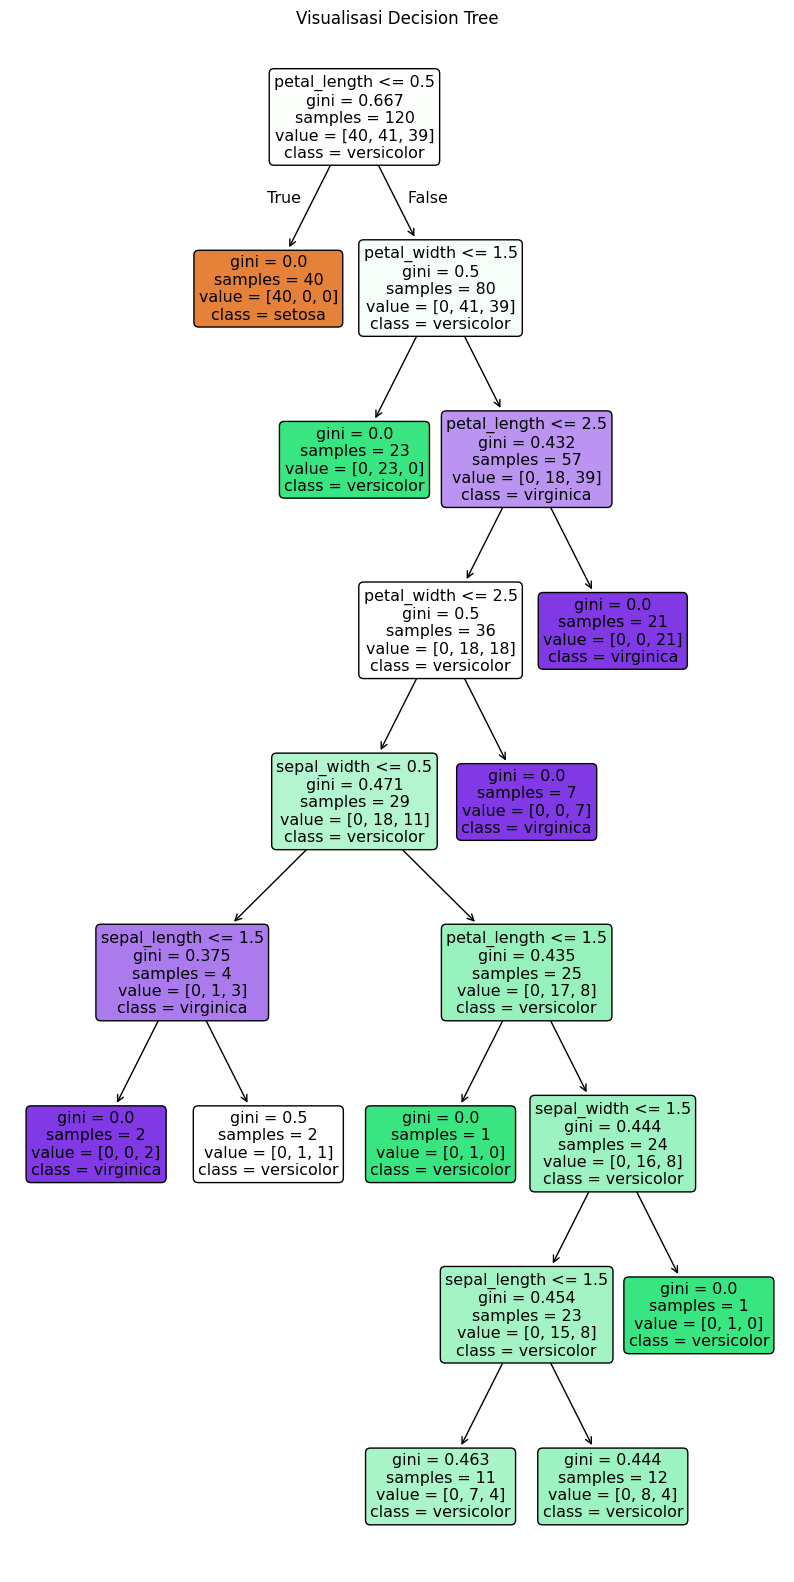

In [14]:

# -----------------------------
# Proses Klasifikasi Decision Tree
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_width['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualisasi Decision Tree
# -----------------------------
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


### Diskritisasi Dataset Iris menggunakan Equal-Frequency Binning

#### Penjelasan Konsep Diskritisasi menggunakan Equal-Frequency Binning

Pendekatan diskritisasi ketiga yang umum digunakan adalah Equal-Frequency Binning, atau yang dikenal juga dengan istilah quantile-based discretization. Berbeda dari Equal-Width yang berfokus pada pembagian rentang nilai, Equal-Frequency membagi data berdasarkan jumlah data dalam tiap kelompok. Dalam metode ini, semua data terlebih dahulu diurutkan dari yang terkecil ke yang terbesar. Kemudian, data dibagi ke dalam sejumlah bin di mana masing-masing bin mengandung jumlah data yang kurang lebih sama banyaknya. Jika data dibagi menjadi empat bin, maka masing-masing akan mencakup sekitar 25% dari total data, dan batas antar-bin ditentukan berdasarkan kuantil seperti Q1 (25%), Q2 (median), dan Q3 (75%).

Keunggulan dari Equal-Frequency Binning terletak pada kemampuannya dalam menjaga keseimbangan distribusi jumlah data antar bin, yang sangat penting dalam proses pelatihan model machine learning untuk menghindari bias. Misalnya, jika sebuah bin hanya berisi sedikit data, model bisa mengabaikannya. Namun, metode ini juga memiliki kelemahan. Karena berfokus pada jumlah data, lebar interval di masing-masing bin bisa sangat berbeda. Bin pertama bisa mencakup rentang nilai yang sempit, sedangkan bin lain bisa mencakup rentang yang sangat luas. Ketidakkonsistenan ini dapat menimbulkan kesulitan saat interpretasi hasil atau visualisasi grafik. Meski demikian, Equal-Frequency tetap menjadi pilihan tepat ketika kestabilan jumlah sampel per kategori lebih diutamakan daripada keseragaman rentang nilai.

In [15]:
# Fungsi manual untuk equal-frequency discretization
def discretize_cdf(data, m):
    data = list(data)
    data_sorted = sorted(data)
    n = len(data_sorted)
    thresholds = [-float('inf')]

    # Hitung batas kuantil
    for k in range(1, m):
        q = k / m
        index = (n - 1) * q
        floor = int(index)
        ceil = floor + 1
        frac = index - floor
        if ceil >= n:
            val = data_sorted[floor]
        else:
            val = data_sorted[floor] + (data_sorted[ceil] - data_sorted[floor]) * frac
        thresholds.append(val)

    thresholds.append(float('inf'))

    # Tentukan label bin untuk setiap nilai
    labels = []
    for value in data:
        for b in range(1, len(thresholds)):
            if thresholds[b - 1] <= value < thresholds[b]:
                labels.append(label_map[b - 1])
                break

    return labels

# Terapkan discretization ke setiap kolom
df_equal_frequency = pd.DataFrame({
    'sepal_length': discretize_cdf(df['sepal length (cm)'], 4),
    'sepal_width':  discretize_cdf(df['sepal width (cm)'], 4),
    'petal_length': discretize_cdf(df['petal length (cm)'], 4),
    'petal_width':  discretize_cdf(df['petal width (cm)'], 4)
})

# Tambahkan kolom kelas di depan
df_equal_frequency.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil
print(df_equal_frequency.to_string(index=False))


     class sepal_length sepal_width petal_length petal_width
    setosa            B           D            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           D            A           A
    setosa            B           D            B           B
    setosa            A           D            A           B
    setosa            A           D            A           A
    setosa            A           B            A           A
    setosa            A           C            A           A
    setosa            B           D            A           A
    setosa            A           D            B           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            C           D            A           A
    setosa            B 

In [16]:
# Simpan ke file CSV
df_equal_frequency.to_csv('diskritisasi_iris_equalfrequency.csv', index=False)

#### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan Equal-Frequency

Disini saya melakukan klasifikasi Naive Bayes pada data iris hasil diskritisasi menggunakan Equal-Frequency Binning, untuk mencari akurasi data iris

In [17]:

# -----------------------------
# Proses Klasifikasi Naive Bayes (CategoricalNB)
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_frequency['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Frequency

Disini saya melakukan klasifikasi Decision Tree pada data iris hasil diskritisasi menggunakan Equal-Frequency Binning, untuk mencari akurasi data iris

Akurasi: 0.9666666666666667

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



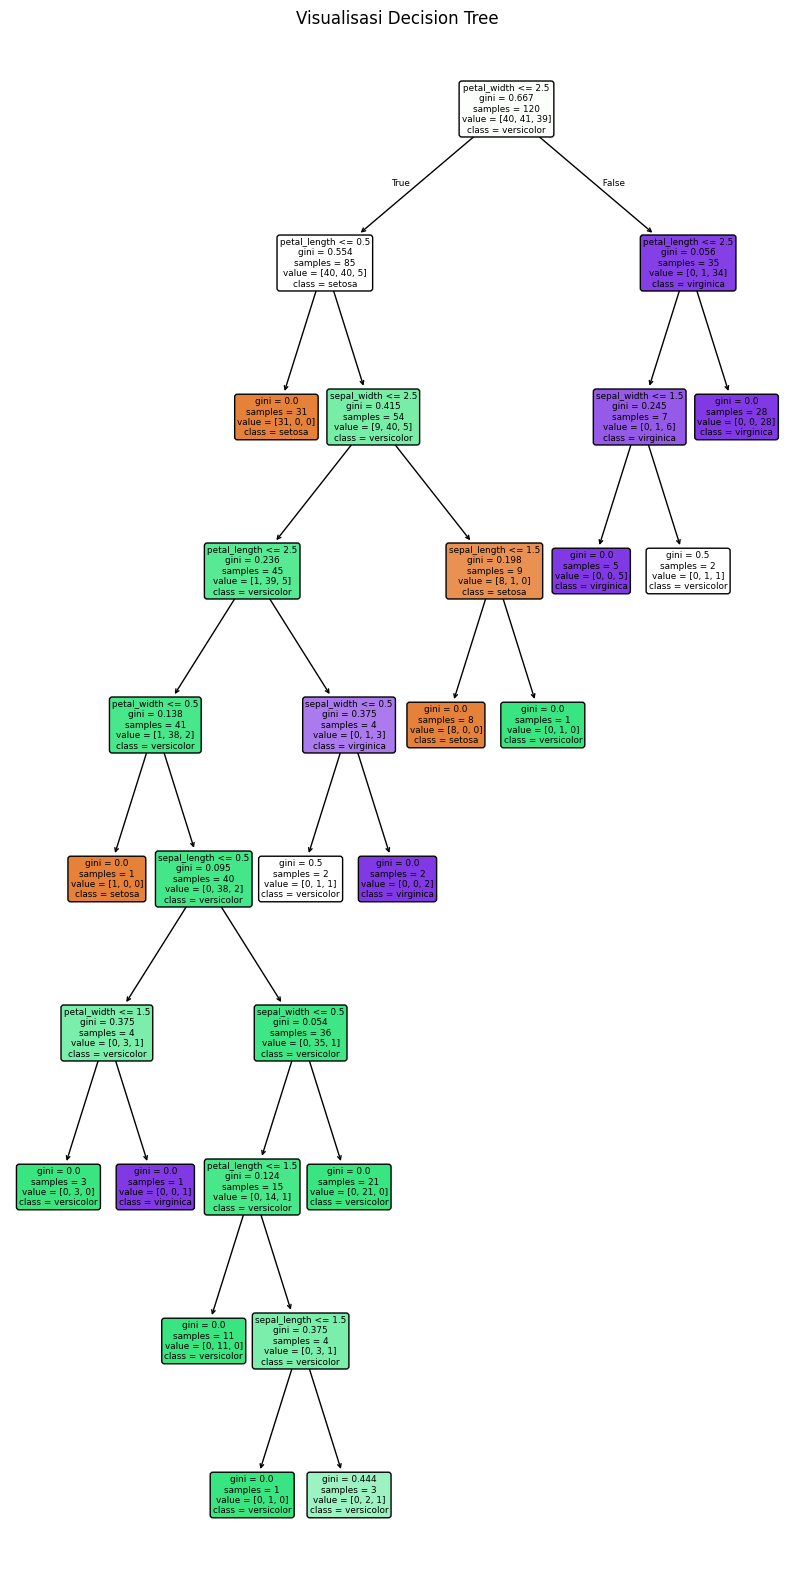

In [18]:

# -----------------------------
# Proses Klasifikasi Decision Tree
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_frequency['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualisasi Decision Tree
# -----------------------------
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


### Perbandingan Akurasi

Data iris asli
- Naive Bayes = 100 %
- Decision Tree = 100 %

Data iris hasil diskritisasi menggunakan Kmeans
- Naive Bayes = 90 %
- Decision Tree = 90 %

Data iris hasil diskritisasi menggunakan Equal-Width Binning
- Naive Bayes = 93,33 %
- Decision Tree = 96,67 %

Data iris hasil diskritisasi menggunakan Equal-Frequency Binning
- Naive Bayes = 100 %
- Decision Tree = 96,67 %